<a href="https://colab.research.google.com/github/Touhou09/modelImplementTrial/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


퍼셉트론은 가중치를 사람이 수동으로 설치해야 하지만 신경망은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습한다.




# 퍼셉트론에서 신경망으로

In [ ]:
# 신경망 그림 3-1

위 그림과 같이 퍼셉트론과 크게 다르지 않아 보이고 실제로도 뉴런이 연결되는 방식은 퍼셉트론과 동일하다.



In [ ]:
# 신경망 식

위의 식처럼 입력신호의 총합을 출력신호로 변환하는 함수를 '활성화 함수'라고 한다.

위의 식은 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리되어 아래와 같은 2개의 식으로 나눌 수 있다

In [ ]:
# 활성화 식 2개

식 1은 가중치가 달린 입력 신화와 편향의 총합을 계산하고 이를 a라고 한다.

식 2는 a를 함수 h()에 넣어 y를 출력한다.

식 1과 2를 그림으로 표현하면 아래와 같다.

In [ ]:
# 활성화함수 처리그림
# 활성화 과정 그림

위 그림에서 가중치 신호를 조합한 결과가 a라는 노드가 되고, 활성화 함수 h()를 통과해 y라는 노드로 변환된다.


# 활성화 함수

활성화 함수가 임계값을 경계로 출력이 바뀌는데, 이런 함수를 '계단함수'라고 한다.

즉, 퍼셉트론은 계단함수를 이용한다.

신경망은 계단함수 외에도 다른 함수를 이용할 수 있다.

* 시그모이드 함수


In [ ]:
# 시그모이드 식

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에게 전달한다.
퍼셉트론과의 차이는 활성화 함수 뿐이다.
그 외에 뉴런이 여러 층으로 이어지는 구조와 신호를 전달하는 방법은 기본적으로 퍼셉트론과 같다.


* 계단 함수
계단 함수는 입력이 0을 넘으면 1을 출력하고 그 외에는 0을 출력하는 함수이다.
식을 코드로 구현하면 아래와 같다.

In [ ]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

넘파이 배열을 지원하도록 수정하면 아래와 같다.

In [ ]:
def step_function_numpy(x):
  y = x > 0
  return y.astype(np.int)
# numpy의 자료형을 변환할때는 astype()으로 변형한다

계단 함수의 그래프를 직접 그리면 아래와 같다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


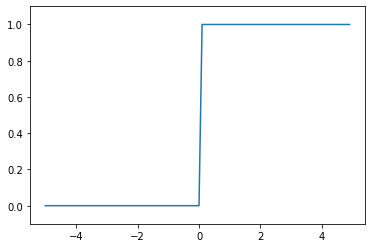

In [10]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

시그모이드 함수 구현은 아래와 같다

In [11]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
# exp(-x)는 e^-x 와 같다

x = np.array([-1.0,1.0,2.0])

sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

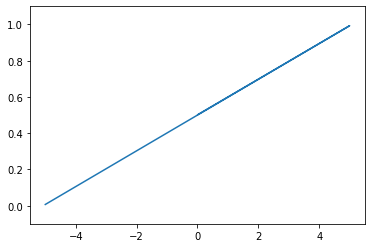

In [13]:
x = np.array([-5.0,5.0,0.01])
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()
# 그래프가 꼬여서 나옴

* 시그모이드 함수와 계단 함수의 비교

두 함수의 차이는 연속적인지 아닌지 이고, 두 함수의 공통점은 입력이 아무리 크거나 작아도 출력이 0과 1로 수렴한다는 점이다.

* 비선형 함수

계단 함수와 시그모이드 함수 둘 다 비선형 함수이다.

신경망에서는 비선형 함수를 활성화 함수를 사용한다.

그 이유는 선형 함수는 아무리 층을 깊게 해도 은닉층이 없는 네트워크와 차이가 없다.

즉, 은닉층이 있는 네트워크를 구성하기 위해서는 비선형 함수를 사용해서 구성해야한다.



* ReLU 함수
최근에 시그모이드 대신 이용하는 함수이다.

ReLU는 입력이 0을 넘으면 그 값을 출력하고 0 이하이면 0을 출력하는 함수이다.

수식은 아래와 같다.

In [ ]:
# ReLU 식

식 자체가 간단하므로 아래와 같이 간단하게 표현 가능하다.

In [14]:
def ReLU(x):
  return np.maximum(0,x)

# 다차원 배열의 계산



In [19]:
# 1차원 배열
A = np.array([1,2,3,4])

print(A)

np.ndim(A)

A.shape

A.shape[0]


[1 2 3 4]


4

In [21]:
# 2차원 배열
B = np.array([[1,2],[3,4],[5,6]])
print(B)

np.ndim(B)

[[1 2]
 [3 4]
 [5 6]]


2

In [24]:
# 행렬의 곱
A = np.array([[1,2],[3,4]])
A.shape

B = np.array([[5,6],[7,8]])
B.shape

np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [25]:
# 행렬의 형식이 다른 경우의 곱
A = np.array([[1,2,3],[4,5,6]])
A.shape

B = np.array([[1,2],[3,4],[5,6]])
B.shape

np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [27]:
# 두 행렬의 대응하는 차원 수가 동일해야한다.

C = np.array([[1,2],[3,4]])
C.shape

# np.dot(A,C)

(2, 2)